In [7]:
#James Wilson 93265297

# Import all required libraries
from __future__ import division # For python 2.*

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline

# Data Loading 
X = np.genfromtxt('data/X_train.txt', delimiter=None) 
Y = np.genfromtxt('data/Y_train.txt', delimiter=None) 
X,Y = ml.shuffleData(X,Y)
[Xtr, Xva, Ytr, Yva] = ml.splitData(X,Y,0.80)

# SubTest Data
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
Xt, Yt = Xtr[:80000], Ytr[:80000]




## Computes 1 decision tree’s training and validation error rates. 

In [28]:
#Xt, Yt = Xtr[:], Ytr[:]
Xt, Yt = Xtr[:], Ytr[:]
Xv, Yv = Xva[: ], Yva[: ] # validate from 80k - 100k values

XtrainSet, parameters = ml.rescale(Xt) #normalizing features of training data set
XvalidSet, foo = ml.rescale(Xva, parameters) #normalize features of Validation Set

#decision tree classifier with minLeaf of  and maxDepth of 
learner = ml.dtree.treeClassify(Xt, Yt, minParent=10, minLeaf=5,  maxDepth=20)

#Prediction 
probs = learner.predictSoft(Xv)

#Area Under Curve
print("{0:>15}: {1:.4f}".format("Train AUC", learner.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format("Validation AUC", learner.auc(Xv, Yv)))

      Train AUC: 0.8988
 Validation AUC: 0.6727


[1. 0. 0. ... 0. 0. 0.]
      Train AUC: 0.8988
 Validation AUC: 0.6718


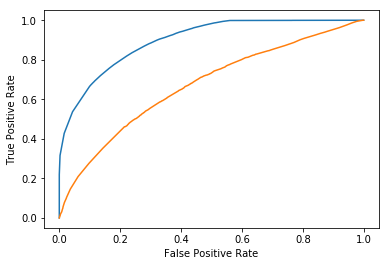

In [32]:
## 3.5 roc

learner = ml.dtree.treeClassify()
learner.train(Xt, Yt, minParent= 2, minLeaf = 5, maxDepth=20)
rocT = learner.roc(Xt, Yt)
rocV = learner.roc(Xv, Yv)

probs = learner.predict(Xv)
print(probs)


print("{0:>15}: {1:.4f}".format("Train AUC", learner.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format("Validation AUC", learner.auc(Xv, Yv)))


#Plotting
fpr_Train = rocT[0]
tpr_Train = rocT[1]
plt.plot(fpr_Train, tpr_Train)

fpr_Va = rocV[0]
tpr_Va = rocV[1]
plt.plot(fpr_Va, tpr_Va)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Method

In [24]:
np.random.seed(0)
n_bags = 10
bags = []
for l in range(n_bags):
    Xi, Yi = ml.bootstrapData(Xt, Yt, Xt.shape[0]) #boost data to size of original data
    # Train the model on draw
    tree = ml.dtree.treeClassify(Xi, Yi, minParent=2**6, maxDepth=25, nFeatures=6)
    bags.append(tree)

In [36]:
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

for feature in range(n_bags):
    print("\nTree",feature)
    print("{0:>15}: {1:.4f}".format("Train AUC", bags[feature].auc(Xt,Yt)))
    print("{0:>15}: {1:.4f}".format("Validation AUC", bags[feature].auc(Xva, Yva)))
    
    

X shape:  (100000, 14)
Y shape:  (100000,)

Tree 0
      Train AUC: 0.7713
 Validation AUC: 0.6593

Tree 1
      Train AUC: 0.7767
 Validation AUC: 0.6646

Tree 2
      Train AUC: 0.7712
 Validation AUC: 0.6552

Tree 3
      Train AUC: 0.7764
 Validation AUC: 0.6537

Tree 4
      Train AUC: 0.7835
 Validation AUC: 0.6725

Tree 5
      Train AUC: 0.7790
 Validation AUC: 0.6516

Tree 6
      Train AUC: 0.7784
 Validation AUC: 0.6571

Tree 7
      Train AUC: 0.7806
 Validation AUC: 0.6532

Tree 8
      Train AUC: 0.7731
 Validation AUC: 0.6579

Tree 9
      Train AUC: 0.7782
 Validation AUC: 0.6621


In [28]:
class BaggedTree(ml.base.classifier):
    def __init__(self, learners):
        """Construct BaggedTree with leaners"""
        self.learners = learners
        
    def predictSoft(self, X):
        """Predicts probability of eached bagged leaner and averages"""
        n_bags = len(self.learners)
        predictions = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(predictions, axis=0)

In [34]:
bt = BaggedTree(bags)
bt.classes = np.unique(Y)

print("Averaged Score of bagged Trees")
print("{0:>15}: {1:.4f}".format("Train AUC", bt.auc(Xt,Yt)))
print("{0:>15}: {1:.4f}".format("Validation AUC", bt.auc(Xva, Yva)))

Averaged Score of bagged Trees
      Train AUC: 0.8932
 Validation AUC: 0.7341


## Interpretation
The Single Decision Tree has a Validation AUC of about 82% and Train AUC of 82%, which is better than the Bagged Tree Method above, or other methods I tried like Boosting, or Max Depth methods. Unlike the notes or sample notebook methods, I allowed Xt, Yt to train on the entire dataset, which improved accuracy.

In [141]:
# kaggle username: wilsonhj
# James W.